<a href="https://colab.research.google.com/github/NuriaAk/DataLearn/blob/DE-101/Titanic_%2B_GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sf
import numpy as np

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Reading a CSV file with specific columns
df_1 = pd.read_csv('train.csv', usecols = ['PassengerId', 'Survived', 'Pclass'])

In [ ]:
df_1.head()

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


In [ ]:
# Short description (count, mean, std,min/max, quantitiles)
# You can see the missing variables by count
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# types of variables
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Sorting in descending order
df.sort_values('Fare', ascending = False).head(2) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
# to save the sorted version of the dataframe: inplace argument. 
# If we set this argument as True, it will write over it.
df.sort_values('Fare', ascending = False, inplace = True)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [ ]:
#na_position which helps us to set a position for the NaN values in the dataset
df.sort_values('Cabin', na_position = 'last').tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S


In [ ]:
# To count the occurence of a variable
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
D              3
              ..
D15            1
D49            1
D11            1
D7             1
B102           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
#Using .nunique() to count number of unique values that occur in dataset or in a column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df[['Sex', 'Age']].nunique()

Sex     2
Age    88
dtype: int64

In [ ]:
df.Survived.count()

891

In [ ]:
# Changing the data type
# We checked the data types of the columns in Titanic dataset. We saw that the type of Embarked column is object. After counting the unique values in Embarked column with .unique(), we can see that there are 3 unique values in that column. So we can consider that the data type should be categorical. 
# To change the datatype of that column the code below must be executed:
df['Embarked'] = df['Embarked'].astype('category')
df['Embarked'].dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

In [ ]:
#Filtering under one condition
df['Embarked'] == 'C'

258     True
737     True
679     True
88     False
27     False
       ...  
633    False
413    False
822    False
732    False
674    False
Name: Embarked, Length: 891, dtype: bool

In [ ]:
# If I write the code like this 
# df["Embarked"] = "C"
# It will set all the values as “C” in the Embarked column.

In [ ]:
# To filter out
df[df['Embarked'] == 'C'].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [ ]:
# Or like this
embarked_not_c = df['Embarked']  !=  'C'
df[embarked_not_c].head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [ ]:
# Filtering more than 1 condition AND OR
df_female = df['Sex'] == 'female'
df_fare_under_100 = df['Fare'] < 100
df[df_female & df_fare_under_100].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q


In [ ]:
df_older_70 = df['Age'] > 70
df_fare_above_500 = df['Fare'] > 500
df[df_older_70 | df_fare_above_500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [ ]:
# Finding the null values with .isnull()
null_mask = df['Age'].isnull()
df[null_mask].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [ ]:
# To count of the null values of all columns in a dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Dealing with missing vauels
# ignore the “Cabin” column since %70 of that column is missing. 
# And we are going to fill the missing Ages with median value of that column

In [ ]:
# Dropping a column , axis shows that we delete it column-wise
df.drop(labels = ["Cabin", "Name"], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 258 to 674
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     889 non-null    category
dtypes: category(1), float64(2), int64(5), object(2)
memory usage: 102.9+ KB


In [ ]:
#To fill missing values in a dataframe, there is a method called .fillna()
df['Sex'].fillna(0, inplace = True)
df['Sex'].isnull().sum()

0

Text(0.5, 1.0, 'Destiny of Passengers from Titanic')

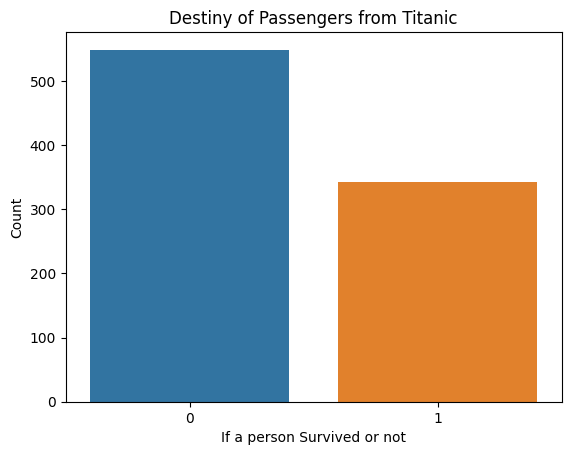

In [ ]:
#Distribution of the variable survived or not
sns.countplot(x = 'Survived', data = df)
plt.xlabel('If a person Survived or not')
plt.ylabel('Count')
plt.title('Destiny of Passengers from Titanic')

In [ ]:
# Lets do the logistic regression. With C() we show the categorical variables in the formula
# Survived - dependant variable; C(Pclass) + C(Sex) + Age independant variables
logit_res = sf.glm('Survived ~ C(Pclass) + C(Sex) + Age', df, family = sm.families.Binomial()).fit()

In [ ]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Thu, 06 Apr 2023   Deviance:                       647.28
Time:                        10:33:42   Pearson chi2:                     767.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7770      0.401      9.416      0.000       2.991       4.563
C(Pclass)[T.2]    -1.3098      0.278     -4.710      0.000      -1.855      -0.765
C(Pclass)[T.3]    -2.5806      0.281     -9.169      0.000      -3.132      -2.029
C(Sex)[T.male]    -2.5228      0.207    -12.164      0.000      -2.929      -2.116
Age               -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==================================================================================
"""

In [ ]:
# Statsmodels library takes the cat.variable and choose one gradation as a referent, and shows the others
#`Intercept` - шансы выжить (логарифмические) для женщины в первом классе, которой 0 лет. 

Text(0.5, 1.0, 'Passenger Classes in Titanic')

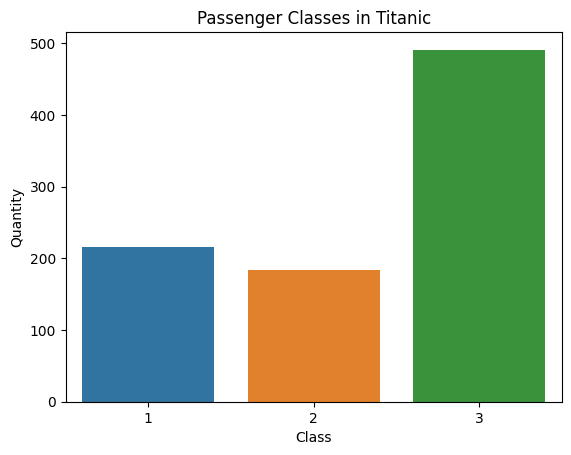

In [ ]:
sns.countplot(x = 'Pclass', data = df)
plt.xlabel('Class')
plt.ylabel('Quantity')
plt.title('Passenger Classes in Titanic')

In [ ]:
# Multinominal regression
multinom_res = sf.mnlogit('Pclass ~ C(Sex) + Age', df).fit()
multinom_res.summary()

Optimization terminated successfully.
         Current function value: 0.946845
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Pclass   No. Observations:                  714
Model:                        MNLogit   Df Residuals:                      708
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                 0.09072
Time:                        10:35:35   Log-Likelihood:                -676.05
converged:                       True   LL-Null:                       -743.50
Covariance Type:            nonrobust   LLR p-value:                 3.475e-28
==================================================================================
      Pclass=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.2137      0.296      4.096      0.000       0.633       1.794
C(Sex)[T.male]     0.3281      0.223      1.475      0.140      -0.108       0.764
Age               -0.0433      0.008     -5.426      0.000      -0.059      -0.028
----------------------------------------------------------------------------------
      Pclass=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3206      0.277      8.392      0.000       1.779       2.863
C(Sex)[T.male]     1.0768      0.210      5.139      0.000       0.666       1.487
Age               -0.0750      0.008     -9.649      0.000      -0.090      -0.060
==================================================================================
"""